# Evolution strategies on test functions for optimization

## Test functions for optimization

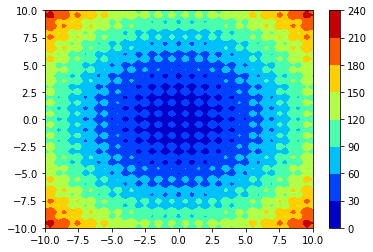

In [4]:
import matplotlib.pyplot as plt
import numpy as np

import cma


x = np.linspace(-10, 10, num=100)
y = np.linspace(-10, 10, num=100)
x, y = np.meshgrid(x, y)

f = cma.ff.rastrigin
z = np.reshape(f(np.stack([x, y], -1).reshape(-1, 2)), [100, 100])

fig, ax = plt.subplots(1, 1, figsize=(6, 4))
c = ax.contourf(x, y, z, cmap='jet')
fig.colorbar(c)

In [5]:
from time import time
from datetime import timedelta

from cma.fitness_transformations import Expensify

from concurrent.futures import ProcessPoolExecutor
from lagom.utils import CloudpickleWrapper
from lagom import Logger
from lagom import CMAES


t = time()

with ProcessPoolExecutor(max_workers=80) as executor:
    logger = Logger()
    es = CMAES([9.0]*100, 1.0, {'popsize': 32, 'seed': 1})
    #g = Expensify(f, time=0.01)
    g = f
    g = CloudpickleWrapper(g)  # extremely useful for parallel, avoid getting stuck sometimes

    for generation in range(1000):
        solutions = es.ask()
        function_values = list(executor.map(g, solutions, chunksize=16))
        es.tell(solutions, function_values)
        if generation == 0 or (generation+1)%100 == 0:
            print(f'Generation # {generation+1}: {es.result.fbest}')
        logger('generation', generation)
        logger('fbest', es.result.fbest)

print(f'\nTotal time: {timedelta(seconds=round(time() - t))}')

(16_w,32)-aCMA-ES (mu_w=9.2,w_1=19%) in dimension 100 (seed=1, Sat Mar 16 21:07:49 2019)
Generation # 1: 8923.084084029262
Generation # 100: 1173.329487436927
Generation # 200: 970.7187856119405
Generation # 300: 899.2954581943238
Generation # 400: 899.2954581943238
Generation # 500: 751.9006434199703
Generation # 600: 205.48003163759188
Generation # 700: 198.0348474963622
Generation # 800: 197.99669221004365
Generation # 900: 197.99649019892877
Generation # 1000: 197.99648923701295

Total time: 0:00:22


Text(0.5, 1.0, 'Rastrigin function - 100 dim')

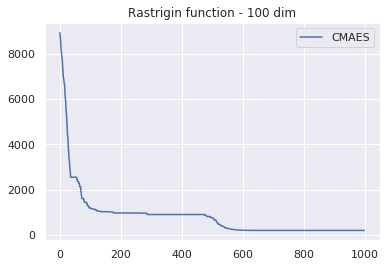

In [62]:
import seaborn as sns


sns.set()
ax = sns.lineplot(logger.logs['generation'], logger.logs['fbest'], label='CMAES')
ax.set_title('Rastrigin function - 100 dim')

In [71]:
from collections import namedtuple

x = namedtuple('A', ['a', 'b'], defaults=[None, None])
x()

es.sigma0

1.0